# Data Cleaning

## Importing librairies

On commence par importer les librairies avec lesquelles on va travailler dans notre code.




In [ ]:
import seaborn as sns
#Import useful packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.api import OLS
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML
from statsmodels.stats.diagnostic import het_breuschpagan

In [ ]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=717e8dda6a0b78a4905ba94d18f27f688d680c2aca63479936079566b18bad5d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Scraped Data

In [ ]:
Casa_houses_Data = pd.read_excel('/content/drive/MyDrive/Casa_houses_cleaned1.xlsx', sheet_name='Sheet1')

In [ ]:
Casa_houses_Data.head()

prix       superficie piecesou chambres  Pieces  \
0  1 720 000         100\t\t\t        2 Chambres     4.0   
1  1 750 000               118        3 Chambres     5.0   
2  1 100 000          94\t\t\t        2 Chambres     4.0   
3  1 050 000           106\t\t          4 Pieces     4.0   
4  2 080 000   160\n\t\t\t\t\t        3 Chambres     5.0   

                                quartier caracteristiques  
0              Les Hôpitaux à Casablanca         Terrasse  
1  Bourgogne Est à\n\t\t\t\t\tCasablanca           Garage  
2          Oasis à\n\t\t\t\t\tCasablanca           Garage  
3     Beauséjour à\n\t\t\t\t\tCasablanca           Garage  
4   Les Hôpitaux à\n\t\t\t\t\tCasablanca         Terrasse

Afin de mieux comprendre, visualiser et travailler avec notre Data, nous devons commencer par la nettoyer en transformant les colonnes Superficie, Prix et pieces ou chambres en colonnes de type int, et la colonne caracteristiques en differentes colonnes boolean demontrant les differentes caracteristiques presentes dans chaque appartement.
Il est aussi a noter qu'il y a des \n\t a enlever de notre data.

## Cleaning Data

On commence par realiser quelques changements sur la maniere avec laquelle nous visualisons notre data.

In [ ]:
Casa_houses_Data['caracteristiques'] = Casa_houses_Data['caracteristiques'].str.replace('\t', '')
#Casa_houses_Data['caracteristiques'] = Casa_houses_Data['caracteristiques'].str.replace('\n','')

In [ ]:
Casa_houses_Data["caracteristiques"] = "Contient-" + Casa_houses_Data["caracteristiques"]
c = pd.get_dummies(Casa_houses_Data["caracteristiques"])
Casa_houses_Data2 = pd.concat([Casa_houses_Data,c], axis=1)

In [ ]:
Casa_houses_Data2['superficie'] = Casa_houses_Data2['superficie'].str.replace('\t', '')
Casa_houses_Data2['superficie'] = Casa_houses_Data2['superficie'].str.replace('\n', '')

Casa_houses_Data2['quartier'] = Casa_houses_Data2['quartier'].str.replace('\t', '')
Casa_houses_Data2['quartier'] = Casa_houses_Data2['quartier'].str.replace('\n', '')
Casa_houses_Data3= Casa_houses_Data2.drop(['piecesou chambres','piecesou chambres'], axis=1)

In [ ]:
Casa_houses_Data3.head()

prix superficie  Pieces                   quartier  \
0  1 720 000         100     4.0  Les Hôpitaux à Casablanca   
1  1 750 000         NaN     5.0  Bourgogne Est àCasablanca   
2  1 100 000          94     4.0          Oasis àCasablanca   
3  1 050 000         106     4.0     Beauséjour àCasablanca   
4  2 080 000         160     5.0   Les Hôpitaux àCasablanca   

    caracteristiques  Contient-Ascenseur  Contient-Chambre rangement  \
0  Contient-Terrasse               False                       False   
1    Contient-Garage               False                       False   
2    Contient-Garage               False                       False   
3    Contient-Garage               False                       False   
4  Contient-Terrasse               False                       False   

   Contient-Cheminée  Contient-Cuisine équipée  Contient-Double vitrage  ...  \
0              False                     False                    False  ...   
1              False                     False                    False  ...   
2              False                     False                    False  ...   
3              False                     False                    False  ...   
4              False                     False                    False  ...   

   Contient-Moyen standing  Contient-Orientation:\n Est  \
0                    False                        False   
1                    False                        False   
2                    False                        False   
3                    False                        False   
4                    False                        False   

   Contient-Orientation:\n Nord  Contient-Orientation:\n Ouest  \
0                         False                          False   
1                         False                          False   
2                         False                          False   
3                         False                          False   
4                         False                          False   

   Contient-Orientation:\n Sud  Contient-Piscine  Contient-Salon Marocain  \
0                        False             False                    False   
1                        False             False                    False   
2                        False             False                    False   
3                        False             False                    False   
4                        False             False                    False   

   Contient-Sécurité  Contient-Terrasse  Contient-Économique  
0              False               True                False  
1              False              False                False  
2              False              False                False  
3              False              False                False  
4              False               True                False  

[5 rows x 27 columns]

### Detection des problemes dans la data

On commence par utiliser une fonction qui nous permettra de visualiser le nombre de valeurs Null et de valeurs manquantes.

In [ ]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html
# Null values in the dataset
null_values = Casa_houses_Data3.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (Casa_houses_Data3.isnull().sum() / len(Casa_houses_Data3)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

Il existe plusieurs valeurs manquantes ou null dans notre Data.
Pour avoir une idee plus generale sur notre Data, on peut utiliser Ydata Profing, ou on va creer un ProfileReport sur lequel on va se baser pour determiner les aspects de notre Data que nous devons nettoyer.

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(Casa_houses_Data3, title = 'Avant Cleaning', html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

On peut voir a travers l'overview de notre ProfilearReport, qu'il y a 48 alertes. Notamment beaucoup d'imbalance dans certaines colonnes qui contiennent les caracteristiques, des lignes dupliquees, des valeurs manquantes, ainsi que beaucoup de correlation entre la colonne caracteristiques et les autres colonnes qu'on a cree, donc nous pouvons supprimer cette colonne, et appliquer d'autres changements pour resoudre les autres problemes rencontres.

### Cleaning et resolution des problemes

In [ ]:
# Remove non-numeric characters from the column and replace them with NaN
Casa_houses_Data3['superficie'] = pd.to_numeric(Casa_houses_Data3['superficie'], errors='coerce')

# Fill NaN values with 0 and convert the column to integers
Casa_houses_Data3['superficie'] = Casa_houses_Data3['superficie'].fillna(0).astype(int)

In [ ]:
# Remove non-numeric characters and commas, and then convert to integers
Casa_houses_Data3['prix'] = Casa_houses_Data3['prix'].str.replace(r'[^0-9]', '', regex=True)

# Fill NaN values with 0 and convert the cleaned column to integers
Casa_houses_Data3['prix'] = Casa_houses_Data3['prix'].fillna(0).astype(int)

In [ ]:
df=Casa_houses_Data3
df.drop('caracteristiques', axis=1, inplace=True)
df.dropna(inplace=True)
# Find the index of the row with the maximum value in column 'A'
max_index = df['prix'].idxmax()

# Drop the row with the maximum value
df.drop(index=max_index, inplace=True)

In [ ]:
df = df[df['prix'] != 0]
df = df[df['superficie'] != 0]

In [ ]:
df.drop('Contient-Meublé',axis=1, inplace= True)
df.drop('Contient-Ascenseur',axis=1, inplace= True)
df.drop('Contient-Chambre rangement',axis=1, inplace= True)
df.drop('Contient-Cheminée',axis=1, inplace= True)
df.drop('Contient-Cuisine équipée',axis=1, inplace= True)
df.drop('Contient-Double vitrage',axis=1, inplace= True)
df.drop('Contient-En cours de construction',axis=1, inplace= True)
df.drop('Contient-Façade extérieure',axis=1, inplace= True)
df.drop('Contient-Four',axis=1, inplace= True)
df.drop('Contient-Haut standing',axis=1, inplace= True)
df.drop('Contient-Jardin',axis=1, inplace= True)
df.drop('Contient-Moyen standing',axis=1, inplace= True)
df.drop('Contient-Piscine',axis=1, inplace= True)
df.drop('Contient-Salon Marocain',axis=1, inplace= True)
df.drop('Contient-Sécurité',axis=1, inplace= True)
df.drop('Contient-Économique',axis=1, inplace= True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
from ydata_profiling import ProfileReport
profile2 = ProfileReport(df, title = 'Apres Cleaning', html={'style':{'full_width':True}})
profile2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Comme vous pouvez le voir, les alertes rencontrees ont diminue de 48 alertes avant le cleaning, a 6 alertes uniquement.
Les alertes qui restent sont la colonne Pieces qui est tres correlee avec superficie, le prix avec superficie. Cela en soi ne constitue pas un prbleme, vu que cette correlation est logique et juste.
Il y a aussi une alerte d'imblance dans les colonnes d'orientation Est, Nord et Ouest. Mais pour le moment, nous allons les garder, vu que ces colonnes pourront nous donner une idee sur la tendance d'achat et la distrivution des prix dependemment de l'orientation des appartements.


# Data Description

## Data Exploring

Dans cette partie, nous allons explorer notre data pour avoir une idee sur les differentes colonnes dont nous disposons, leurs types, le nombre de valeurs manquantes, de Nan etc...

In [ ]:
df.shape

(1206, 10)

In [ ]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe()

prix   superficie       Pieces
count  1.206000e+03  1206.000000  1206.000000
mean   1.954556e+06   129.062189     3.964345
std    1.405637e+06    75.284458     1.688002
min    6.001000e+03    28.000000     1.000000
25%    1.100000e+06    85.000000     3.000000
50%    1.550000e+06   113.000000     4.000000
75%    2.400000e+06   157.000000     5.000000
max    1.300000e+07   730.000000    21.000000

In [ ]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

In [ ]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical ))

In [ ]:
# Null values in the dataset
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (df.isnull().sum() / len(df)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

Comme vous pouvez le voir, nous ne disposons d'aucune valeur Null contrairement a ce dont on disposait avant le cleaning de la Data.

In [ ]:
# Exploring rows with missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]
html_rows_with_missing_values = create_scrollable_table(rows_with_missing_values.head(), 'rows_with_missing_values', 'Rows with missing values')

display(HTML(html_rows_with_missing_values))

### Correlation des variables

**Matrice de Correlation**

La matrice de correlation sert a explorer les relations entre différentes variables dans un ensemble de données. Chaque cellule de la matrice affiche le degré de corrélation entre deux variables, variant de -1 à 1. Cette représentation visuelle offre une vue d'ensemble rapide des associations entre les variables, facilitant ainsi l'identification de tendances et de patterns dans les données analysées.

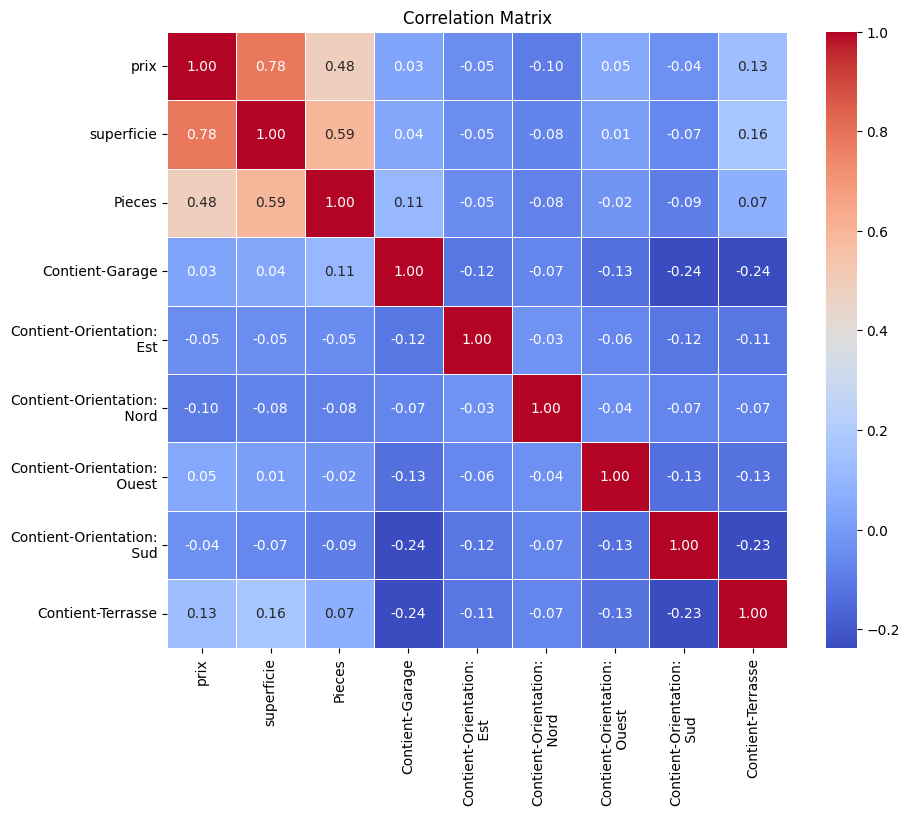

In [ ]:
columns_to_exclude = ['quartier', 'caracteristiques']

# Select only the columns that are not in the exclusion list
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]
numeric_df = df[columns_to_include]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
#print("\nMatrice de correlation :")
#print(correlation_matrix)

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Distribution du prix

Dans notre Data, nous disposons d'une variable dependante sur laquelle nous voulons agir par la suite, qui n'est autre que le prix.

On commence par la visualisation de la distribution du prix et de sa densite.

In [ ]:
import scipy.stats as stats

# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(df['prix'])

# Create a histogram of the SalePrice column
hist_data = go.Histogram(x=df['prix'], nbinsx=50, name="Histogram", opacity=0.75, histnorm='probability density', marker=dict(color='purple'))

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(df['prix'].min(), df['prix'].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", line=dict(color="green"))

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])
# Set the layout for the plot
fig.update_layout(
    title="SalePrice Distribution",
    xaxis_title="prix",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",

)

# Create a Q-Q plot
qq_data = stats.probplot(df['prix'], dist="norm")
qq_fig = px.scatter(x=qq_data[0][0], y=qq_data[0][1], labels={'x': 'Theoretical Quantiles', 'y': 'Ordered Values'}, color_discrete_sequence=["purple"])
qq_fig.update_layout(
    title="Q-Q plot",

)
# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x

# Add the line of best fit to the Q-Q plot
line_data = go.Scatter(x=line_x, y=line_y, mode="lines", name="Normal Line", line=dict(color="green"))

# Update the Q-Q plot with the normal line
qq_fig.add_trace(line_data)

# Show the plots
fig.show()
qq_fig.show()


## Distribution des prix par quartier

In [ ]:
dwelling_types = df['quartier'].value_counts()
dwelling_prices = df.groupby('quartier')['prix'].mean()

# Format labels for the second graph
formatted_dwelling_prices = ['MAD' + f'{value:,.2f}' for value in dwelling_prices.values]

# Create bar charts
fig1 = go.Figure(data=[go.Bar(
    x=dwelling_types.index,
    y=dwelling_types.values,
    marker_color='rgb(76, 175, 80)',
    text=dwelling_types.values,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig1.update_layout(
    title='Distribution of quartiers',
    xaxis_title='quartier',
    yaxis_title='Count',

)

fig2 = go.Figure(data=[go.Bar(
    x=dwelling_prices.index,
    y=dwelling_prices.values,
    marker_color='rgb(156, 39, 176)',
    text=formatted_dwelling_prices,
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig2.update_layout(
    title='Average Sale Price by quartier',
    xaxis_title='quartier',
    yaxis_title='Prix',

)

# Show the figures
fig1.show()
fig2.show()

Nous pouvons aussi visualiser la distribution du prix par metre carre.

In [ ]:
# Calculate Price per Square Meter
df['prix_per_sqm'] = df['prix'] / df['superficie']

# Calculate average price per squared meter for each quartier
price_per_sqm = df.groupby('quartier')['prix_per_sqm'].mean()

# Create a bar chart for average price per squared meter
fig3 = go.Figure(data=[go.Bar(
    x=price_per_sqm.index,
    y=price_per_sqm.values,
    marker_color='rgb(255, 87, 34)',
    text=['MAD' + f'{value:,.2f}' for value in price_per_sqm.values],
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig3.update_layout(
    title='Average Price per Square Meter by quartier',
    xaxis_title='quartier',
    yaxis_title='Price per Square Meter',

)

# Show all the figures together
fig3.show()

## Distribution des prix par nombre de pieces

In [ ]:
# Calculate average price per squared meter for each quartier
price_per_sqm = df.groupby('Pieces')['prix_per_sqm'].mean()

# Create a bar chart for average price per squared meter
fig4 = go.Figure(data=[go.Bar(
    x=price_per_sqm.index,
    y=price_per_sqm.values,
    marker_color='rgb(255, 87, 34)',
    text=['MAD' + f'{value:,.2f}' for value in price_per_sqm.values],
    textposition='outside',
    width=0.4,
    marker=dict(line=dict(width=2, color='rgba(0,0,0,1)'), opacity=1)
)])
fig4.update_layout(
    title='Average Price per Square Meter by quartier',
    xaxis_title='nbr de pieces',
    yaxis_title='Price per Square Meter',
    xaxis=dict(tickvals=list(range(1, 22)))
)

# Show all the figures together
fig4.show()

## Distribution des prix par superficie

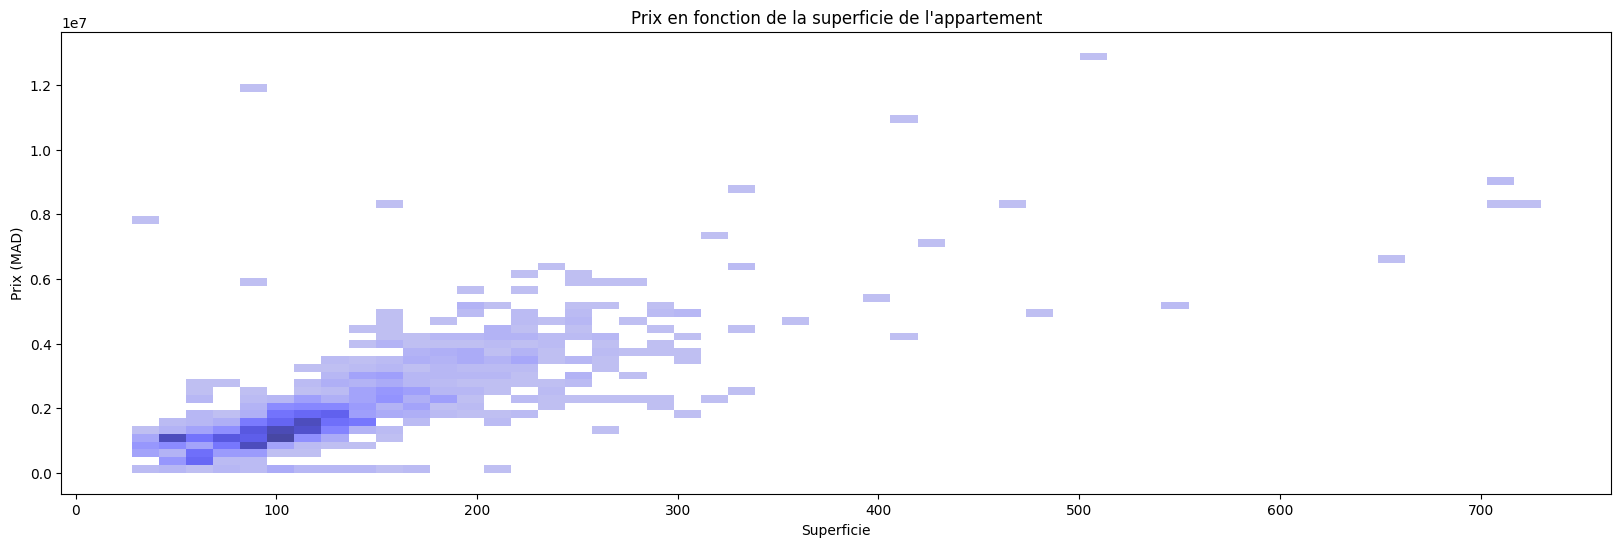

In [ ]:
# Set the figure size and create a figure object
plt.figure(figsize=(20, 6))
fig = plt.gcf()

# Create the histogram plot using seaborn
sns.histplot(x='superficie', y='prix', data=df, color='blue')  # Use green color for the histogram

# Set plot title and labels with white color
plt.title("Prix en fonction de la superficie de l'appartement")
plt.xlabel('Superficie')
plt.ylabel('Prix (MAD)')
# Show the plot
plt.show()


## Prix en relation avec l'orientation de l'appartement

L'appartement peut etre de differentes orientations, orientation Sud, Nord, Ouest et Est.

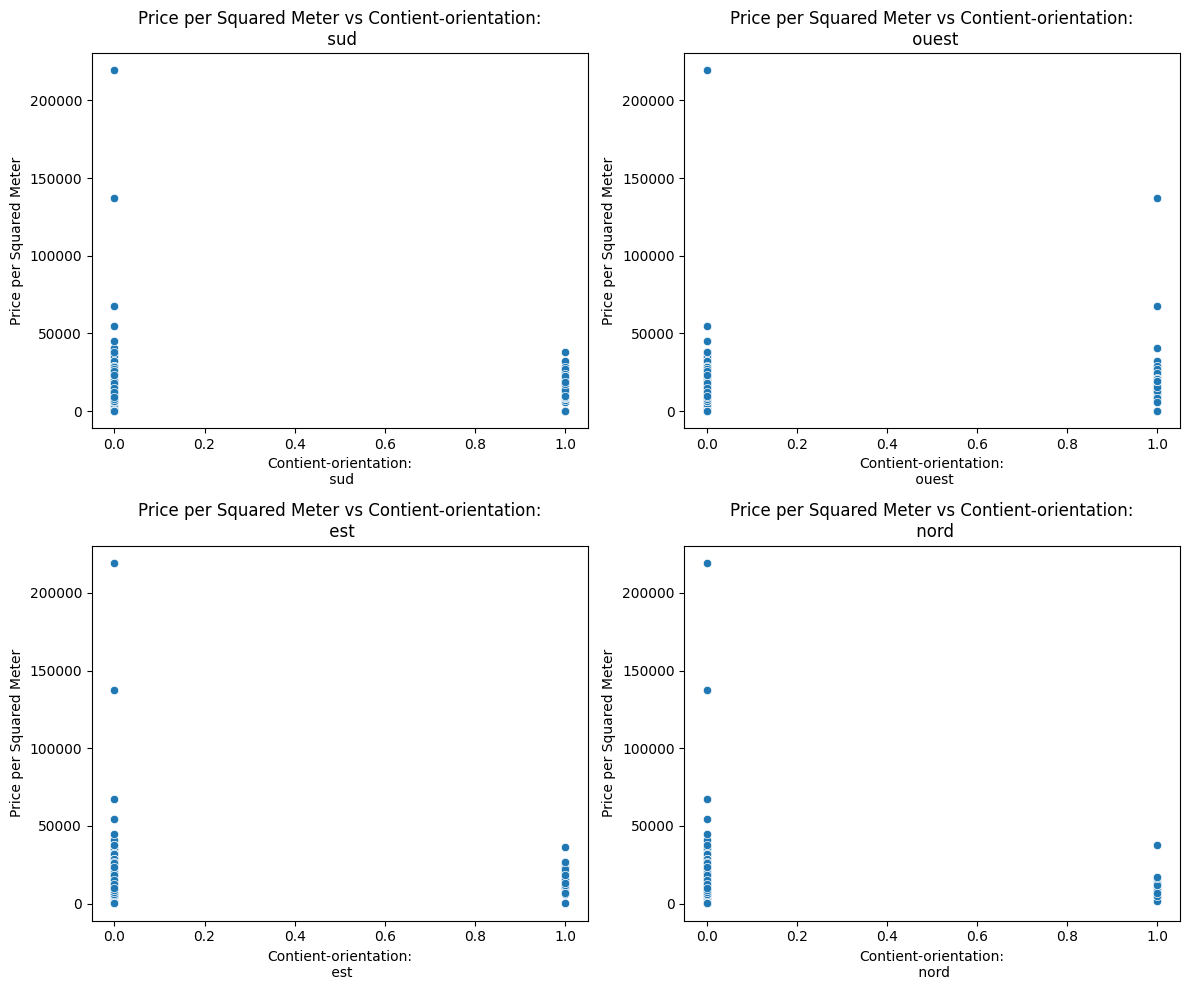

In [ ]:
# Create a list of boolean characteristic column names
characteristics = ['Contient-Orientation:\n Sud', 'Contient-Orientation:\n Ouest', 'Contient-Orientation:\n Est', 'Contient-Orientation:\n Nord']

# Create subplots for each boolean characteristic
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each boolean characteristic
for i, char in enumerate(characteristics):
    # Create scatter plot for the current characteristic
    sns.scatterplot(data=df, x=char, y='prix_per_sqm', ax=axes[i])
    axes[i].set_title(f'Price per Squared Meter vs {char.capitalize()}')
    axes[i].set_ylabel('Price per Squared Meter')
    axes[i].set_xlabel(char.capitalize())

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


<ipython-input-32-79b70cd89cde>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




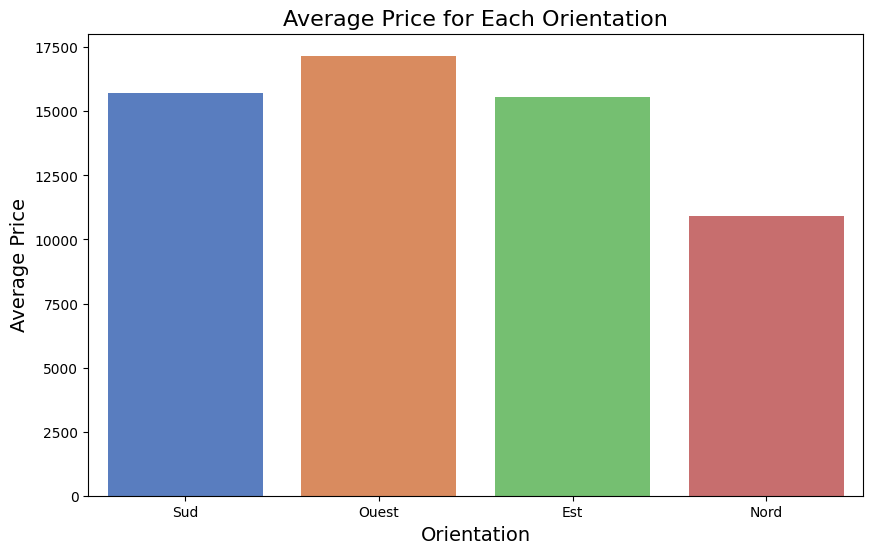

In [ ]:
# Calculate average price for each orientation
avg_price_sud = df[df['Contient-Orientation:\n Sud'] == True]['prix_per_sqm'].mean()
avg_price_ouest = df[df['Contient-Orientation:\n Ouest'] == True]['prix_per_sqm'].mean()
avg_price_est = df[df['Contient-Orientation:\n Est'] == True]['prix_per_sqm'].mean()
avg_price_nord = df[df['Contient-Orientation:\n Nord'] == True]['prix_per_sqm'].mean()

# Create a bar plot to visualize the average price for each orientation
plt.figure(figsize=(10, 6))

# Plot bar plot for each orientation
sns.barplot(x=['Sud', 'Ouest', 'Est', 'Nord'], y=[avg_price_sud, avg_price_ouest, avg_price_est, avg_price_nord], palette='muted')

# Set labels and title
plt.xlabel('Orientation', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price for Each Orientation', fontsize=16)

# Show the plot
plt.show()

In [ ]:
# Count the number of rows where all orientations are false
count_all_false = ((df['Contient-Orientation:\n Sud'] == False) &
                   (df['Contient-Orientation:\n Ouest'] == False) &
                   (df['Contient-Orientation:\n Est'] == False) &
                   (df['Contient-Orientation:\n Nord'] == False)).sum()

print("Number of rows where all orientations are false:", count_all_false)
# Calculate the percentage of rows where all orientations are false out of all rows
percentage_all_false = (count_all_false / len(df)) * 100

print("Percentage of rows where all orientations are false:", percentage_all_false)

Number of rows where all orientations are false: 805
Percentage of rows where all orientations are false: 66.74958540630183


***Remarque*** :  66.75% des lignes ne contiennent pas d'informations sur l'orientation.

## Prix en relation avec les autres caracteristiques de l'appartement

In [ ]:
df.columns

Index(['prix', 'superficie', 'Pieces', 'quartier', 'Contient-Garage',
       'Contient-Orientation:\n Est', 'Contient-Orientation:\n Nord',
       'Contient-Orientation:\n Ouest', 'Contient-Orientation:\n Sud',
       'Contient-Terrasse', 'prix_per_sqm'],
      dtype='object')

Parmi les caracteristiques de l'appartement, on trouve : le garage, la terasse et l'orientation.

On va visualiser maintenant la distribution du prix par metre carre dependemment du garage et de la terasse.

### Garage

<ipython-input-35-a13133322e44>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




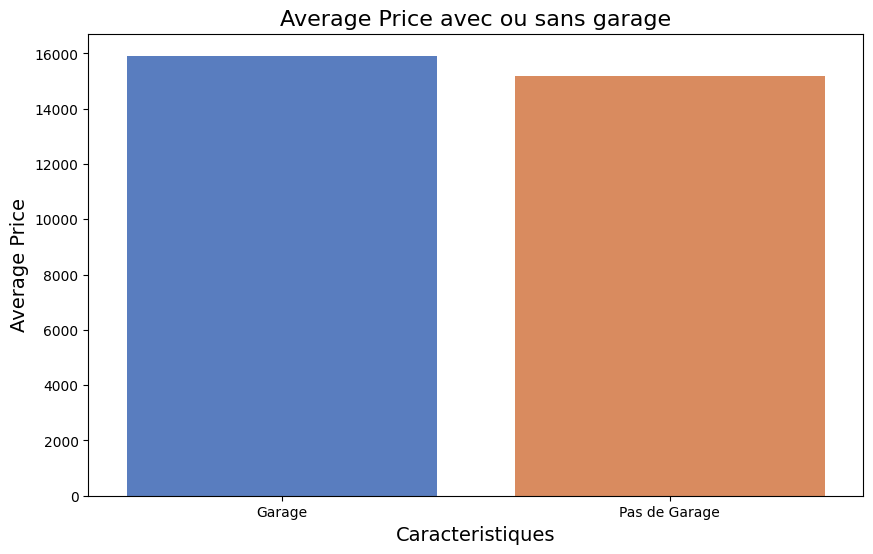

In [ ]:
# Calculate average price for each orientation
avg_price_garageoui = df[df['Contient-Garage'] == True]['prix_per_sqm'].mean()
avg_price_garagenon = df[df['Contient-Garage'] == False]['prix_per_sqm'].mean()

# Create a bar plot to visualize the average price for each orientation
plt.figure(figsize=(10, 6))

# Plot bar plot for each orientation
sns.barplot(x=['Garage', 'Pas de Garage'], y=[avg_price_garageoui, avg_price_garagenon], palette='muted')

# Set labels and title
plt.xlabel('Caracteristiques', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price avec ou sans garage', fontsize=16)

# Show the plot
plt.show()

### Terrasse

<ipython-input-36-90a33bfcb95a>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




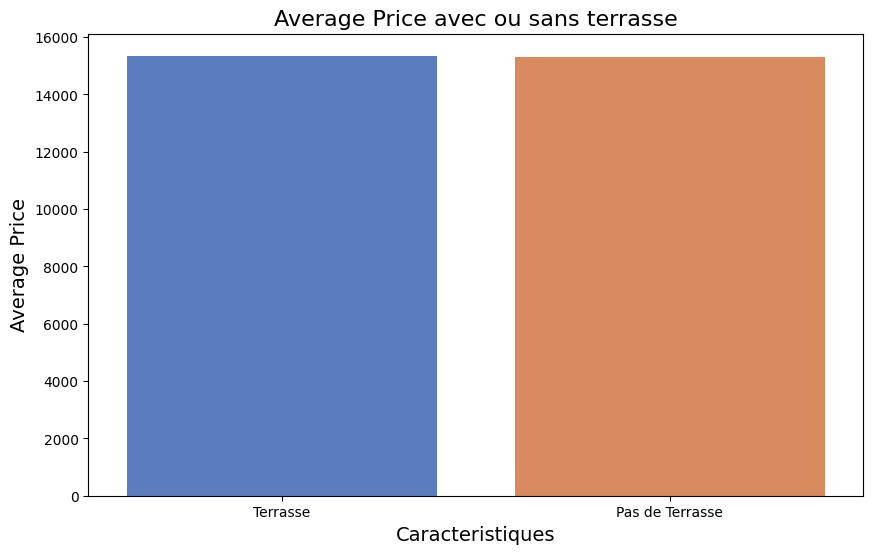

In [ ]:
# Calculate average price for each orientation
avg_price_terrasseoui = df[df['Contient-Terrasse'] == True]['prix_per_sqm'].mean()
avg_price_terrassenon = df[df['Contient-Terrasse'] == False]['prix_per_sqm'].mean()

# Create a bar plot to visualize the average price for each orientation
plt.figure(figsize=(10, 6))

# Plot bar plot for each orientation
sns.barplot(x=['Terrasse', 'Pas de Terrasse'], y=[avg_price_terrasseoui, avg_price_terrassenon], palette='muted')

# Set labels and title
plt.xlabel('Caracteristiques', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price avec ou sans terrasse', fontsize=16)

# Show the plot
plt.show()

**Conclusion**

On peut voir qu'avec ou sans terrasse, le prix moyen par metre carre des appartements est le meme. En ce qui concerne le garage de l'autre cote, il y a une petite augmentation du prix moyen lorsque le garage est present.

# Modeles de prediction



## Regression lineaire

On commence par tester la regression lineaire comme modele de prediction pour notre base de donnees.

In [ ]:
pip install statsmodels

Mean Squared Error: 348728203182.86475
R-squared: 0.7715603776333776


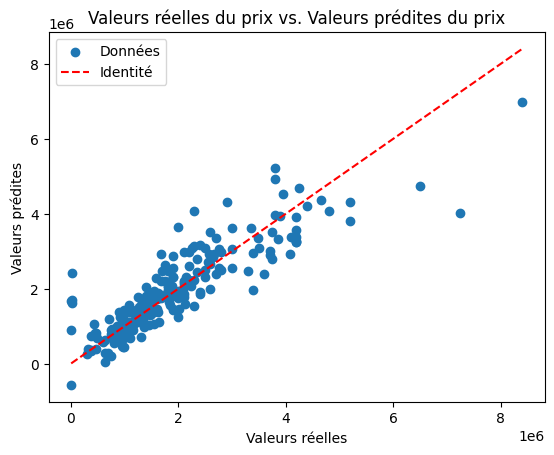

In [ ]:
df_encoded = pd.get_dummies(df, columns=['quartier'])


X = df_encoded.drop(['prix', 'prix_per_sqm'], axis=1)
y = df_encoded['prix']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
#results.summary()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



# Trace le nuage de points des valeurs réelles par rapport aux valeurs prédites
plt.scatter(y_test, y_pred, label='Données')

# Trace la ligne de référence (identité)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Identité')

plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Valeurs réelles du prix vs. Valeurs prédites du prix')
plt.legend()  # Affiche la légende
plt.show()

In [ ]:
# Calculer les résidus
residuals = y_test - y_pred

# Ajouter une colonne de 1 pour l'intercept dans X_test
X_test_with_const = sm.add_constant(X_test)

# Test d'homoscédasticité (test de Breusch-Pagan)
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, X_test_with_const)

# Afficher les résultats du test d'homoscédasticité
print("Test de Breusch-Pagan pour l'homoscédasticité :")
print("LM Statistique:", lm)
print("LM p-value:", lm_p_value)
print("F Statistique:", fvalue)
print("F p-value:", f_p_value)


Test de Breusch-Pagan pour l'homoscédasticité :
LM Statistique: 159.16125802958032
LM p-value: 0.00019879620424221868
F Statistique: 5.313701581745883
F p-value: 7.380422314450806e-19


**Test d’homoscédasticité.**

In [ ]:
df.columns

Index(['prix', 'superficie', 'Pieces', 'quartier', 'Contient-Garage',
       'Contient-Orientation:\n Est', 'Contient-Orientation:\n Nord',
       'Contient-Orientation:\n Ouest', 'Contient-Orientation:\n Sud',
       'Contient-Terrasse', 'prix_per_sqm'],
      dtype='object')

## Modele GLM

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   prix   No. Observations:                 1206
Model:                            GLM   Df Residuals:                     1105
Model Family:                Gaussian   Df Model:                          100
Link Function:               Identity   Scale:                      5.3799e+11
Method:                          IRLS   Log-Likelihood:                -17946.
Date:                Tue, 14 May 2024   Deviance:                   5.9448e+14
Time:                        13:21:07   Pearson chi2:                 5.94e+14
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9365
Covariance Type:            nonrobust                                         
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

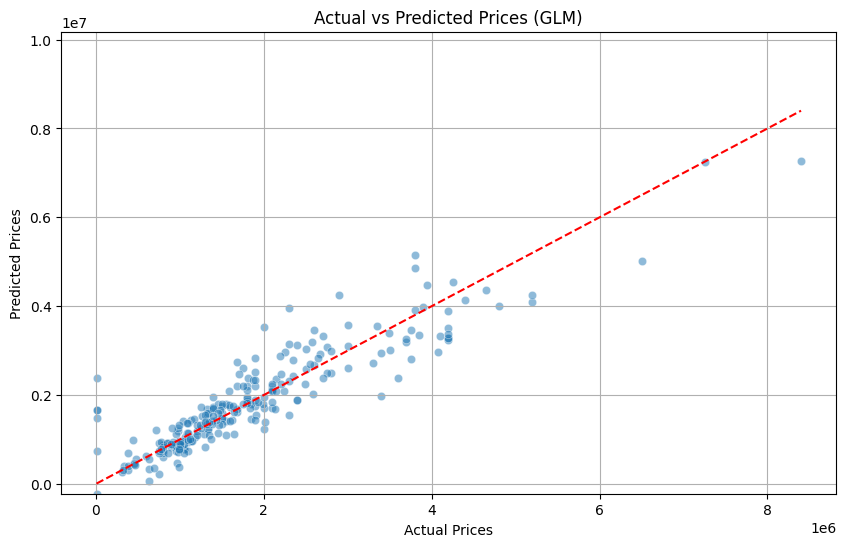

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error


# Utiliser les mêmes données pour ajuster le modèle et pour les prédictions
data = df  # Assurez-vous que Casa_houses_Data3 contient les données complètes

df.rename(columns={'Contient-Garage': 'Garage', 'Contient-Terrasse': 'Terrasse', 'Contient-Orientation:\n Est' : 'Est',
                   'Contient-Orientation:\n Nord' : 'Nord','Contient-Orientation:\n Ouest':'Ouest', 'Contient-Orientation:\n Sud':'Sud',},
           inplace=True)

# Spécifier et ajuster le modèle GLM
model = smf.glm(formula='prix ~ Pieces + superficie + quartier + Garage + Terrasse + Est + Nord + Ouest + Sud', data=data, family=sm.families.Gaussian())
result = model.fit(maxiter=100)

# Afficher un résumé des résultats
print(result.summary())

# Calculer les prédictions du modèle sur les données d'entraînement
predictions = result.predict(data)

# Vérifier les dimensions des données
print("Nombre d'observations dans les données d'origine:", len(data))
print("Nombre de prédictions:", len(predictions))

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(data['prix'], predictions)
print("Mean Squared Error (MSE):", mse)



# Create a DataFrame to compare actual vs. predicted prices
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predictions})
# Plot the scatter plot with identity line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=results_df, alpha=0.5)
plt.plot([results_df['Actual Price'].min(), results_df['Actual Price'].max()],
         [results_df['Actual Price'].min(), results_df['Actual Price'].max()],
         color='red', linestyle='--')  # Identity line

# Option 1: Set manual limits for y-axis
# plt.ylim(min_value, max_value)

# Option 2: Let matplotlib determine y-axis limits automatically
plt.ylim(results_df['Predicted Price'].min() - 10, results_df['Predicted Price'].max() + 10)

plt.title('Actual vs Predicted Prices (GLM)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   prix   No. Observations:                 1206
Model:                            GLM   Df Residuals:                     1105
Model Family:                 Poisson   Df Model:                          100
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4526e+08
Date:                Tue, 14 May 2024   Deviance:                   2.9050e+08
Time:                        13:21:08   Pearson chi2:                 3.31e+08
No. Iterations:                    12   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

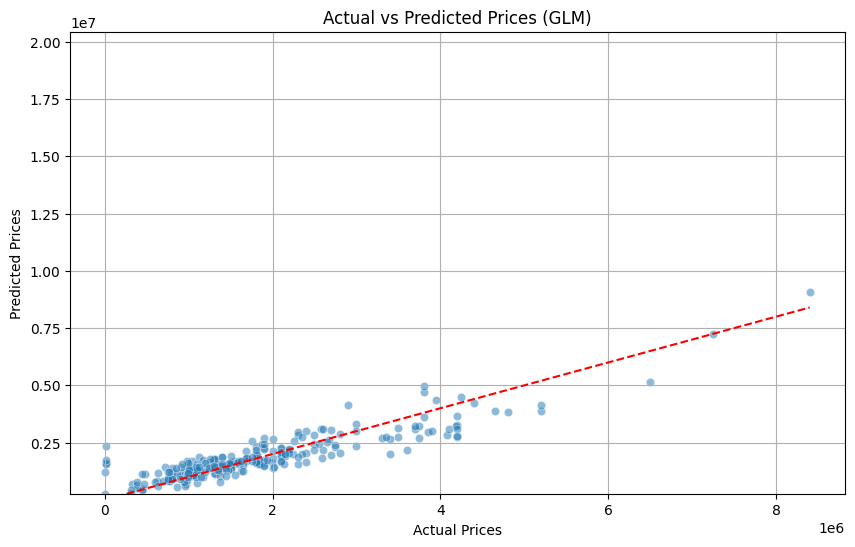

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error


# Utiliser les mêmes données pour ajuster le modèle et pour les prédictions
data = df  # Assurez-vous que Casa_houses_Data3 contient les données complètes

df.rename(columns={'Contient-Garage': 'Garage', 'Contient-Terrasse': 'Terrasse', 'Contient-Orientation:\n Est' : 'Est',
                   'Contient-Orientation:\n Nord' : 'Nord','Contient-Orientation:\n Ouest':'Ouest', 'Contient-Orientation:\n Sud':'Sud',},
           inplace=True)

# Spécifier et ajuster le modèle GLM
model = smf.glm(formula='prix ~ Pieces + superficie + quartier + Garage + Terrasse + Est + Nord + Ouest + Sud', data=data, family=sm.families.Poisson())
result = model.fit(maxiter=100)

# Afficher un résumé des résultats
print(result.summary())

# Calculer les prédictions du modèle sur les données d'entraînement
predictions = result.predict(data)

# Vérifier les dimensions des données
print("Nombre d'observations dans les données d'origine:", len(data))
print("Nombre de prédictions:", len(predictions))

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(data['prix'], predictions)
print("Mean Squared Error (MSE):", mse)



# Create a DataFrame to compare actual vs. predicted prices
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predictions})
# Plot the scatter plot with identity line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=results_df, alpha=0.5)
plt.plot([results_df['Actual Price'].min(), results_df['Actual Price'].max()],
         [results_df['Actual Price'].min(), results_df['Actual Price'].max()],
         color='red', linestyle='--')  # Identity line

# Option 1: Set manual limits for y-axis
# plt.ylim(min_value, max_value)

# Option 2: Let matplotlib determine y-axis limits automatically
plt.ylim(results_df['Predicted Price'].min() - 10, results_df['Predicted Price'].max() + 10)

plt.title('Actual vs Predicted Prices (GLM)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



                 Generalized Linear Model Regression Results                  
Dep. Variable:                   prix   No. Observations:                 1206
Model:                            GLM   Df Residuals:                     1105
Model Family:                   Gamma   Df Model:                          100
Link Function:           InversePower   Scale:                         0.51531
Method:                          IRLS   Log-Likelihood:                -18694.
Date:                Tue, 14 May 2024   Deviance:                       755.25
Time:                        13:21:08   Pearson chi2:                     569.
No. Iterations:                    12   Pseudo R-squ. (CS):            -0.2729
Covariance Type:            nonrobust                                         
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

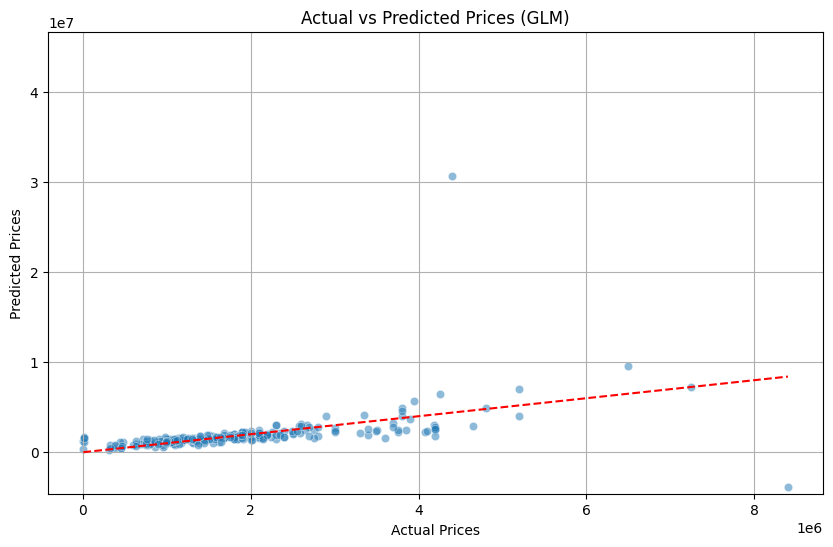

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error


# Utiliser les mêmes données pour ajuster le modèle et pour les prédictions
data = df  # Assurez-vous que Casa_houses_Data3 contient les données complètes

df.rename(columns={'Contient-Garage': 'Garage', 'Contient-Terrasse': 'Terrasse', 'Contient-Orientation:\n Est' : 'Est',
                   'Contient-Orientation:\n Nord' : 'Nord','Contient-Orientation:\n Ouest':'Ouest', 'Contient-Orientation:\n Sud':'Sud',},
           inplace=True)

# Spécifier et ajuster le modèle GLM
model = smf.glm(formula='prix ~ Pieces + superficie + quartier + Garage + Terrasse + Est + Nord + Ouest + Sud', data=data, family=sm.families.Gamma())
result = model.fit(maxiter=100)

# Afficher un résumé des résultats
print(result.summary())

# Calculer les prédictions du modèle sur les données d'entraînement
predictions = result.predict(data)

# Vérifier les dimensions des données
print("Nombre d'observations dans les données d'origine:", len(data))
print("Nombre de prédictions:", len(predictions))

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(data['prix'], predictions)
print("Mean Squared Error (MSE):", mse)



# Create a DataFrame to compare actual vs. predicted prices
results_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predictions})
# Plot the scatter plot with identity line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=results_df, alpha=0.5)
#plt.plot([results_df['Actual Price'].min(), results_df['Actual Price'].max()],
         #[results_df['Actual Price'].min(), results_df['Actual Price'].max()],
         #color='red', linestyle='--')  # Identity line

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Option 1: Set manual limits for y-axis
# plt.ylim(min_value, max_value)

# Option 2: Let matplotlib determine y-axis limits automatically
plt.ylim(results_df['Predicted Price'].min() - 10, results_df['Predicted Price'].max() + 10)

plt.title('Actual vs Predicted Prices (GLM)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()
